In [1]:
# Importing all the important stuff
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
from scipy.stats import randint as sp_randint
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn import preprocessing

Using TensorFlow backend.


In [2]:
def training(classifier, X_train, y_train, X_test, y_test):
    """
    Function that takes the classifier, fits and predicts for test set, returning some metrics
    Parameters:
    -----------
        classifier: the linear model created
        X_train: Training set
        y_train: target variable for training set
        X_test: Test set
        y_test: target variable for test set
    Returns:
    --------
        classifier: the fitted classifier
        metrics: classification metrics
        preds: predictions on training and test set
    """
        
    # Predicting with cross validation on test set
    y_pred_train = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 5, n_jobs = 1)
    
    # Fitting and predicting for training set
    classifier.fit(X_train, y_train)
    y_pred_test = classifier.predict(X_test)
    
    # Getting metrics for training set
    acc_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train, average = 'micro')
    recall_train = recall_score(y_train, y_pred_train, average = 'micro')
    f1_train = f1_score(y_train, y_pred_train, average = 'micro')
    
    # Getting metrics for test set
    acc_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average = 'micro')
    recall_test = recall_score(y_test, y_pred_test, average = 'micro')
    f1_test = f1_score(y_test, y_pred_test, average = 'micro')
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    # Saving metrics into a dictionary
    metrics = {'precision_train': precision_train,
               'precision_test':precision_test,
               'f1_score_train':f1_train,
               'f1_score_test': f1_test,
               'accuracy_train': acc_train,
               'accuracy_test': acc_test,
               'recall_train': recall_train,
               'recall_test': recall_test,
               'cm': cm_test}
    
    preds = {'y_pred_train': y_pred_train,
             'y_pred_test': y_pred_test}
    return classifier, preds, metrics

In [ ]:
def get_trainable_params(model):
    import keras
    params = []
    for layer in model.layers:
        params += keras.engine.training.collect_trainable_weights(layer)
    return params

In [3]:
def unpickle(file):
    """
    Function the unpickles the batches
    Parameters:
    -----------
    Inputs: 
        file to unpickle
    Returns:
        unpickled file
    """
    with open(file, 'rb') as fo:
        d = pickle.load(fo, encoding='bytes')
    return d

In [4]:
# Umpickling all the data and generating X_train, y_train, X_test, y_test

d1 = unpickle('data_batch_1')
d2 = unpickle('data_batch_2')
d3 = unpickle('data_batch_3')
d4 = unpickle('data_batch_4')
d5 = unpickle('data_batch_5')
t = unpickle('test_batch')

labels1 = d1[b'labels']
labels2 = d2[b'labels']
labels3 = d3[b'labels']
labels4 = d4[b'labels']
labels5 = d5[b'labels']
y_test = np.array(t[b'labels'])

data1 = d1[b'data']
data2 = d2[b'data']
data3 = d3[b'data']
data4 = d4[b'data']
data5 = d5[b'data']
X_test = t[b'data']

X_train = np.concatenate((data1, data2, data3, data4, data5), axis=0)
y_train = np.array(labels1 + labels2 + labels3 + labels4 + labels5)

del labels1, labels2, labels3, labels4, labels5, data1, data2, data3, data4, data5 # saving some memory

In [5]:
# Feature Scaling

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [6]:
# Model 1 - Logistic Regression One vs All

clf_one_x_all = LogisticRegression(solver = 'sag', multi_class= 'ovr', random_state = 0, C=1000, n_jobs=1)
clf_one_x_all, preds_one_x_all, metrics_one_x_all = training(clf_one_x_all, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

In [7]:
# Printing metrics of Model 1
metrics_one_x_all

{'accuracy_test': 0.3866,
 'accuracy_train': 0.38078000000000001,
 'cm': array([[472,  49,  49,  38,  26,  35,  19,  55, 179,  78],
        [ 70, 453,  31,  44,  27,  37,  48,  55,  71, 164],
        [ 95,  38, 272,  93, 120,  94, 136,  77,  46,  29],
        [ 53,  57, 106, 230,  57, 191, 153,  48,  40,  65],
        [ 58,  32, 132,  71, 273, 104, 162, 108,  30,  30],
        [ 42,  48,  99, 167,  87, 319,  90,  74,  37,  37],
        [ 25,  42,  85, 126,  95,  83, 451,  38,  24,  31],
        [ 46,  50,  81,  60,  86,  86,  43, 429,  38,  81],
        [139,  75,  22,  34,  12,  48,  14,  24, 521, 111],
        [ 68, 170,  26,  31,  28,  30,  45,  68,  88, 446]]),
 'f1_score_test': 0.3866,
 'f1_score_train': 0.38078000000000001,
 'precision_test': 0.3866,
 'precision_train': 0.38078000000000001,
 'recall_test': 0.3866,
 'recall_train': 0.38078000000000001}

In [8]:
# Model 2 - Logistic Regression Multinomial

clf_multinom = LogisticRegression(solver = 'sag', multi_class= 'multinomial', random_state = 0, C=1000, n_jobs=1)
clf_multinom, preds_multinom, metrics_multinom = training(clf_multinom, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

In [9]:
# Printing metrics of Model 1

metrics_multinom

{'accuracy_test': 0.38519999999999999,
 'accuracy_train': 0.37985999999999998,
 'cm': array([[459,  37,  61,  41,  27,  35,  22,  51, 197,  70],
        [ 76, 451,  34,  45,  25,  35,  41,  51,  76, 166],
        [ 89,  32, 274,  97, 124,  96, 125,  86,  50,  27],
        [ 45,  45, 105, 253,  65, 199, 141,  46,  41,  60],
        [ 55,  31, 140,  77, 287, 105, 156,  96,  28,  25],
        [ 39,  45,  91, 187,  95, 314,  82,  71,  42,  34],
        [ 19,  40,  87, 133, 101,  94, 439,  41,  20,  26],
        [ 49,  50,  82,  68,  94,  78,  46, 420,  38,  75],
        [149,  75,  27,  39,  12,  42,  11,  16, 519, 110],
        [ 77, 185,  19,  36,  30,  27,  46,  57,  87, 436]]),
 'f1_score_test': 0.38519999999999999,
 'f1_score_train': 0.37985999999999998,
 'precision_test': 0.38519999999999999,
 'precision_train': 0.37985999999999998,
 'recall_test': 0.38519999999999999,
 'recall_train': 0.37985999999999998}

In [ ]:
# Applying Grid Search to find the best model and the best parameters
#parameters = {'C': [1,10,100,1000]}            
             
#grid_search = GridSearchCV(estimator = clf_multinom,
#                           param_grid = parameters,
#                           scoring = 'accuracy',
#                           cv = 5,
#                           n_jobs = 4)
#grid_search = grid_search.fit(X_train, y_train)
#best_accuracy = grid_search.best_score_
#best_parameters = grid_search.best_params_

In [ ]:
#print("Best Accuracy: {}".format(best_accuracy))
#print("Best Parameters: {}".format(best_parameters))

In [10]:
# Model 3

clf_nn_1 = Sequential()
clf_nn_1.add(Dense(output_dim = 500, activation = 'relu', init='uniform', input_dim = 3072)) #input and hidden layer
#clf_nn_1.add(Dropout(0.2)) # Dropping 40% of connections to avoid overfit
clf_nn_1.add(Dense(output_dim = 10, activation = 'softmax')) # 10 outputs
#clf_nn.add(Dropout(0.4)) # Dropping connections

# Compiling the ANN
# adam = a type of stochastic gradient descent
# loss = mean squared error
# metrics = tunned for best accuracy
clf_nn_1.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=500, input_dim=3072, activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, activation="softmax")`
  


In [33]:
# Model 4

clf_nn_2 = Sequential()
clf_nn_2.add(Dense(output_dim = 1000, activation = 'relu', init='uniform', input_dim = 3072)) #input and hidden layer
clf_nn_2.add(Dropout(0.25)) # Dropping 40% of connections to avoid overfit
clf_nn_2.add(Dense(output_dim = 1000,  activation = 'relu')) # Second hidden layer
clf_nn_2.add(Dropout(0.25)) # Dropping 40% of connections to avoid overfit
clf_nn_2.add(Dense(output_dim = 10, activation = 'softmax')) # 10 outputs
#clf_nn.add(Dropout(0.4)) # Dropping connections

# Compiling the ANN
# adam = a type of stochastic gradient descent
# loss = mean squared error
# metrics = tunned for best accuracy
clf_nn_2.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=1000, input_dim=3072, activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1000, activation="relu")`
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, activation="softmax")`
  


In [34]:
# Binarizing for training

lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [15]:
# Training the neural net 1

clf_nn_1.fit(X_train, y_train, batch_size = 400, epochs = 100, verbose=2)

Epoch 1/100
12s - loss: 0.1117 - acc: 0.3242
Epoch 2/100
12s - loss: 0.0942 - acc: 0.4056
Epoch 3/100
13s - loss: 0.0865 - acc: 0.4491
Epoch 4/100
12s - loss: 0.0806 - acc: 0.4762
Epoch 5/100
12s - loss: 0.0759 - acc: 0.5023
Epoch 6/100
14s - loss: 0.0714 - acc: 0.5241
Epoch 7/100
13s - loss: 0.0648 - acc: 0.5603
Epoch 8/100
12s - loss: 0.0612 - acc: 0.5793
Epoch 9/100
11s - loss: 0.0581 - acc: 0.5995
Epoch 10/100
11s - loss: 0.0550 - acc: 0.6192
Epoch 11/100
11s - loss: 0.0526 - acc: 0.6358
Epoch 12/100
11s - loss: 0.0507 - acc: 0.6499
Epoch 13/100
11s - loss: 0.0493 - acc: 0.6605
Epoch 14/100
11s - loss: 0.0474 - acc: 0.6748
Epoch 15/100
11s - loss: 0.0452 - acc: 0.6923
Epoch 16/100
11s - loss: 0.0446 - acc: 0.6983
Epoch 17/100
11s - loss: 0.0430 - acc: 0.7086
Epoch 18/100
11s - loss: 0.0408 - acc: 0.7257
Epoch 19/100
11s - loss: 0.0416 - acc: 0.7202
Epoch 20/100
11s - loss: 0.0393 - acc: 0.7366
Epoch 21/100
11s - loss: 0.0386 - acc: 0.7429
Epoch 22/100
11s - loss: 0.0376 - acc: 0.75

In [35]:
# Training the neural net 2

clf_nn_2.fit(X_train, y_train, batch_size = 400, epochs = 100, verbose=2)

Epoch 1/100
30s - loss: 0.0944 - acc: 0.3066
Epoch 2/100
29s - loss: 0.0717 - acc: 0.4198
Epoch 3/100
29s - loss: 0.0684 - acc: 0.4537
Epoch 4/100
29s - loss: 0.0663 - acc: 0.4786
Epoch 5/100
29s - loss: 0.0644 - acc: 0.4926
Epoch 6/100
29s - loss: 0.0630 - acc: 0.5077
Epoch 7/100
29s - loss: 0.0615 - acc: 0.5205
Epoch 8/100
29s - loss: 0.0604 - acc: 0.5298
Epoch 9/100
29s - loss: 0.0590 - acc: 0.5444
Epoch 10/100
29s - loss: 0.0582 - acc: 0.5526
Epoch 11/100
29s - loss: 0.0572 - acc: 0.5599
Epoch 12/100
29s - loss: 0.0564 - acc: 0.5688
Epoch 13/100
29s - loss: 0.0554 - acc: 0.5788
Epoch 14/100
29s - loss: 0.0547 - acc: 0.5841
Epoch 15/100
29s - loss: 0.0538 - acc: 0.5930
Epoch 16/100
29s - loss: 0.0530 - acc: 0.5997
Epoch 17/100
29s - loss: 0.0524 - acc: 0.6060
Epoch 18/100
29s - loss: 0.0517 - acc: 0.6103
Epoch 19/100
29s - loss: 0.0511 - acc: 0.6147
Epoch 20/100
29s - loss: 0.0503 - acc: 0.6219
Epoch 21/100
29s - loss: 0.0500 - acc: 0.6253
Epoch 22/100
29s - loss: 0.0488 - acc: 0.63

In [39]:
# Predicting the Test set results

y_pred_nn_1 = clf_nn_1.predict(X_test)
y_pred_nn_2 = clf_nn_2.predict(X_test)

In [40]:
# Return to undummed format

y_pred_nn_1 = lb.inverse_transform(y_pred_nn_1)
y_pred_nn_2 = lb.inverse_transform(y_pred_nn_2)
y_test = lb.inverse_transform(y_test)
y_train = lb.inverse_transform(y_train)

In [41]:
# Metrics for neural net 1

metrics_nn_1 = {'Accuracy': accuracy_score(y_test, y_pred_nn_1),
                'Precision': precision_score(y_test, y_pred_nn_1, average = 'micro'),
                'Recall': recall_score(y_test, y_pred_nn_1, average = 'micro'),
                'F1 Score': f1_score(y_test, y_pred_nn_1, average = 'micro'),
                'CM': confusion_matrix(y_test, y_pred_nn_1)    
}

metrics_nn_1

{'Accuracy': 0.5252,
 'CM': array([[663,  23,  51,  18,  41,  13,  16,  27, 107,  41],
        [ 63, 534,  26,  31,  15,  28,  11,  18,  74, 200],
        [105,   7, 424,  80, 126, 104,  58,  56,  18,  22],
        [ 45,  11,  94, 319,  74, 256,  85,  58,  18,  40],
        [ 54,  16, 130,  76, 447, 100,  57,  85,  18,  17],
        [ 33,   9,  73, 164,  71, 515,  31,  61,  19,  24],
        [ 25,  15, 106, 116,  92, 107, 475,  17,  16,  31],
        [ 38,  10,  62,  58,  83, 107,  16, 580,  12,  34],
        [118,  44,  22,  22,  21,  25,   7,  12, 664,  65],
        [ 55,  99,  21,  31,  20,  29,  16,  44,  54, 631]]),
 'F1 Score': 0.5252,
 'Precision': 0.5252,
 'Recall': 0.5252}

In [42]:
# Metrics for neural net 2

metrics_nn_2 = {'Accuracy': accuracy_score(y_test, y_pred_nn_2),
                'Precision': precision_score(y_test, y_pred_nn_2, average = 'micro'),
                'Recall': recall_score(y_test, y_pred_nn_2, average = 'micro'),
                'F1 Score': f1_score(y_test, y_pred_nn_2, average = 'micro'),
                'CM': confusion_matrix(y_test, y_pred_nn_2)    
}

metrics_nn_2

{'Accuracy': 0.55610000000000004,
 'CM': array([[647,  31,  44,  23,  62,  13,  15,  13, 103,  49],
        [ 37, 664,  15,  21,  35,   9,  21,   8,  56, 134],
        [ 89,  15, 400,  88, 171,  71,  81,  42,  22,  21],
        [ 18,  12,  64, 394, 125, 191, 107,  41,  17,  31],
        [ 41,   5, 128,  71, 551,  48,  67,  57,  18,  14],
        [ 19,   7,  75, 202,  87, 459,  62,  53,  11,  25],
        [  8,  13,  82,  99, 112,  39, 607,   8,  11,  21],
        [ 40,  10,  44,  63, 120,  94,  22, 558,  11,  38],
        [ 91,  64,  17,  27,  45,  17,   5,   2, 677,  55],
        [ 42, 151,   8,  44,  35,  28,  16,  20,  52, 604]]),
 'F1 Score': 0.55610000000000004,
 'Precision': 0.55610000000000004,
 'Recall': 0.55610000000000004}

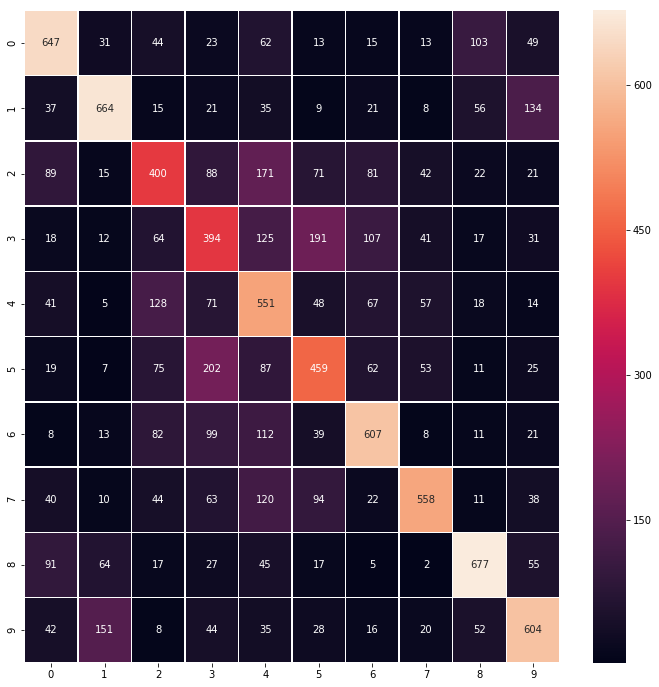

In [53]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(metrics_nn_2['CM'], annot=True, linewidths=.5, ax=ax, fmt='d')
plt.savefig('cm.png')